In [1]:
%matplotlib inline

In [4]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)


import argparse
import datetime
import random

import backtrader as bt


class St(bt.Strategy):
    params = (
        ('printout', False),
        ('stake', 1000),
    )

    def __init__(self):
        pass

    def start(self):
        if self.p.printout:
            txtfields = list()
            txtfields.append('Len')
            txtfields.append('Datetime')
            txtfields.append('Open')
            txtfields.append('High')
            txtfields.append('Low')
            txtfields.append('Close')
            txtfields.append('Volume')
            txtfields.append('OpenInterest')
            print(','.join(txtfields))

    def next(self):
        if self.p.printout:
            # Print only 1st data ... is just a check that things are running
            txtfields = list()
            txtfields.append('%04d' % len(self))
            txtfields.append(self.data.datetime.datetime(0).isoformat())
            txtfields.append('%.2f' % self.data0.open[0])
            txtfields.append('%.2f' % self.data0.high[0])
            txtfields.append('%.2f' % self.data0.low[0])
            txtfields.append('%.2f' % self.data0.close[0])
            txtfields.append('%.2f' % self.data0.volume[0])
            txtfields.append('%.2f' % self.data0.openinterest[0])
            print(','.join(txtfields))

        # Data 0
        for data in self.datas:
            toss = random.randint(1, 10)
            curpos = self.getposition(data)
            if curpos.size:
                if toss > 5:
                    size = curpos.size // 2
                    self.sell(data=data, size=size)
                    if self.p.printout:
                        print('SELL {} @%{}'.format(size, data.close[0]))

            elif toss < 5:
                self.buy(data=data, size=self.p.stake)
                if self.p.printout:
                    print('BUY  {} @%{}'.format(self.p.stake, data.close[0]))


def runstrat(args=None):
    args = parse_args(args)

    cerebro = bt.Cerebro()
    cerebro.broker.set_cash(args.cash)

    dkwargs = dict()
    if args.fromdate:
        fromdate = datetime.datetime.strptime(args.fromdate, '%Y-%m-%d')
        dkwargs['fromdate'] = fromdate

    if args.todate:
        todate = datetime.datetime.strptime(args.todate, '%Y-%m-%d')
        dkwargs['todate'] = todate

    data0 = bt.feeds.BacktraderCSVData(dataname=args.data0, **dkwargs)
    cerebro.adddata(data0, name='Data0')

    data1 = bt.feeds.BacktraderCSVData(dataname=args.data1, **dkwargs)
    cerebro.adddata(data1, name='Data1')

    data2 = bt.feeds.BacktraderCSVData(dataname=args.data2, **dkwargs)
    cerebro.adddata(data2, name='Data2')

    cerebro.addstrategy(St, printout=args.printout)
    if not args.no_pyfolio:
        cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

    results = cerebro.run()
    if not args.no_pyfolio:
        strat = results[0]
        pyfoliozer = strat.analyzers.getbyname('pyfolio')

        returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
        if args.printout:
            print('-- RETURNS')
            print(returns)
            print('-- POSITIONS')
            print(positions)
            print('-- TRANSACTIONS')
            print(transactions)
            print('-- GROSS LEVERAGE')
            print(gross_lev)

        import pyfolio as pf
        pf.create_full_tear_sheet(
            returns,
            positions=positions,
            transactions=transactions,
            # gross_lev=gross_lev,
            live_start_date='2005-05-01',
            round_trips=True)

    if args.plot:
        cerebro.plot(style=args.plot_style)


def parse_args(args=None):

    parser = argparse.ArgumentParser(
        formatter_class=argparse.ArgumentDefaultsHelpFormatter,
        description='Sample for pivot point and cross plotting')

    parser.add_argument('--data0', required=False,
                        default='../../datas/example/yhoo-1996-2015.txt',
                        help='Data to be read in')

    parser.add_argument('--data1', required=False,
                        default='../../datas/example/orcl-1995-2014.txt',
                        help='Data to be read in')

    parser.add_argument('--data2', required=False,
                        default='../../datas/example/nvda-1999-2014.txt',
                        help='Data to be read in')

    parser.add_argument('--fromdate', required=False,
                        default='2005-01-01',
                        help='Starting date in YYYY-MM-DD format')

    parser.add_argument('--todate', required=False,
                        default='2006-12-31',
                        help='Ending date in YYYY-MM-DD format')

    parser.add_argument('--printout', required=False, action='store_true',
                        help=('Print data lines'))

    parser.add_argument('--cash', required=False, action='store',
                        type=float, default=50000,
                        help=('Cash to start with'))

    parser.add_argument('--plot', required=False, action='store_true',
                        help=('Plot the result'))

    parser.add_argument('--plot-style', required=False, action='store',
                        default='bar', choices=['bar', 'candle', 'line'],
                        help=('Plot style'))

    parser.add_argument('--no-pyfolio', required=False, action='store_true',
                        help=('Do not do pyfolio things'))

    import sys
    aargs = args if args is not None else sys.argv[1:]
    return parser.parse_args(aargs)

d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a futur

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.35,2005-01-03,2005-01-06,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\timeseries.py:1141: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  cone_bounds = pd.DataFrame(columns=pd.Float64Index([]))
d:\minicoda\envs\quant\lib\site-packages\pyfolio-0+unknown-py3.8.egg\pyfolio\timeseries.py:1141: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  cone_bounds = pd.DataFrame(columns=pd.Float64Index([]))


ConversionError: Failed to convert value(s) to axis units: (NaT, Timestamp('2006-12-29 00:00:00+0000', tz='UTC'))

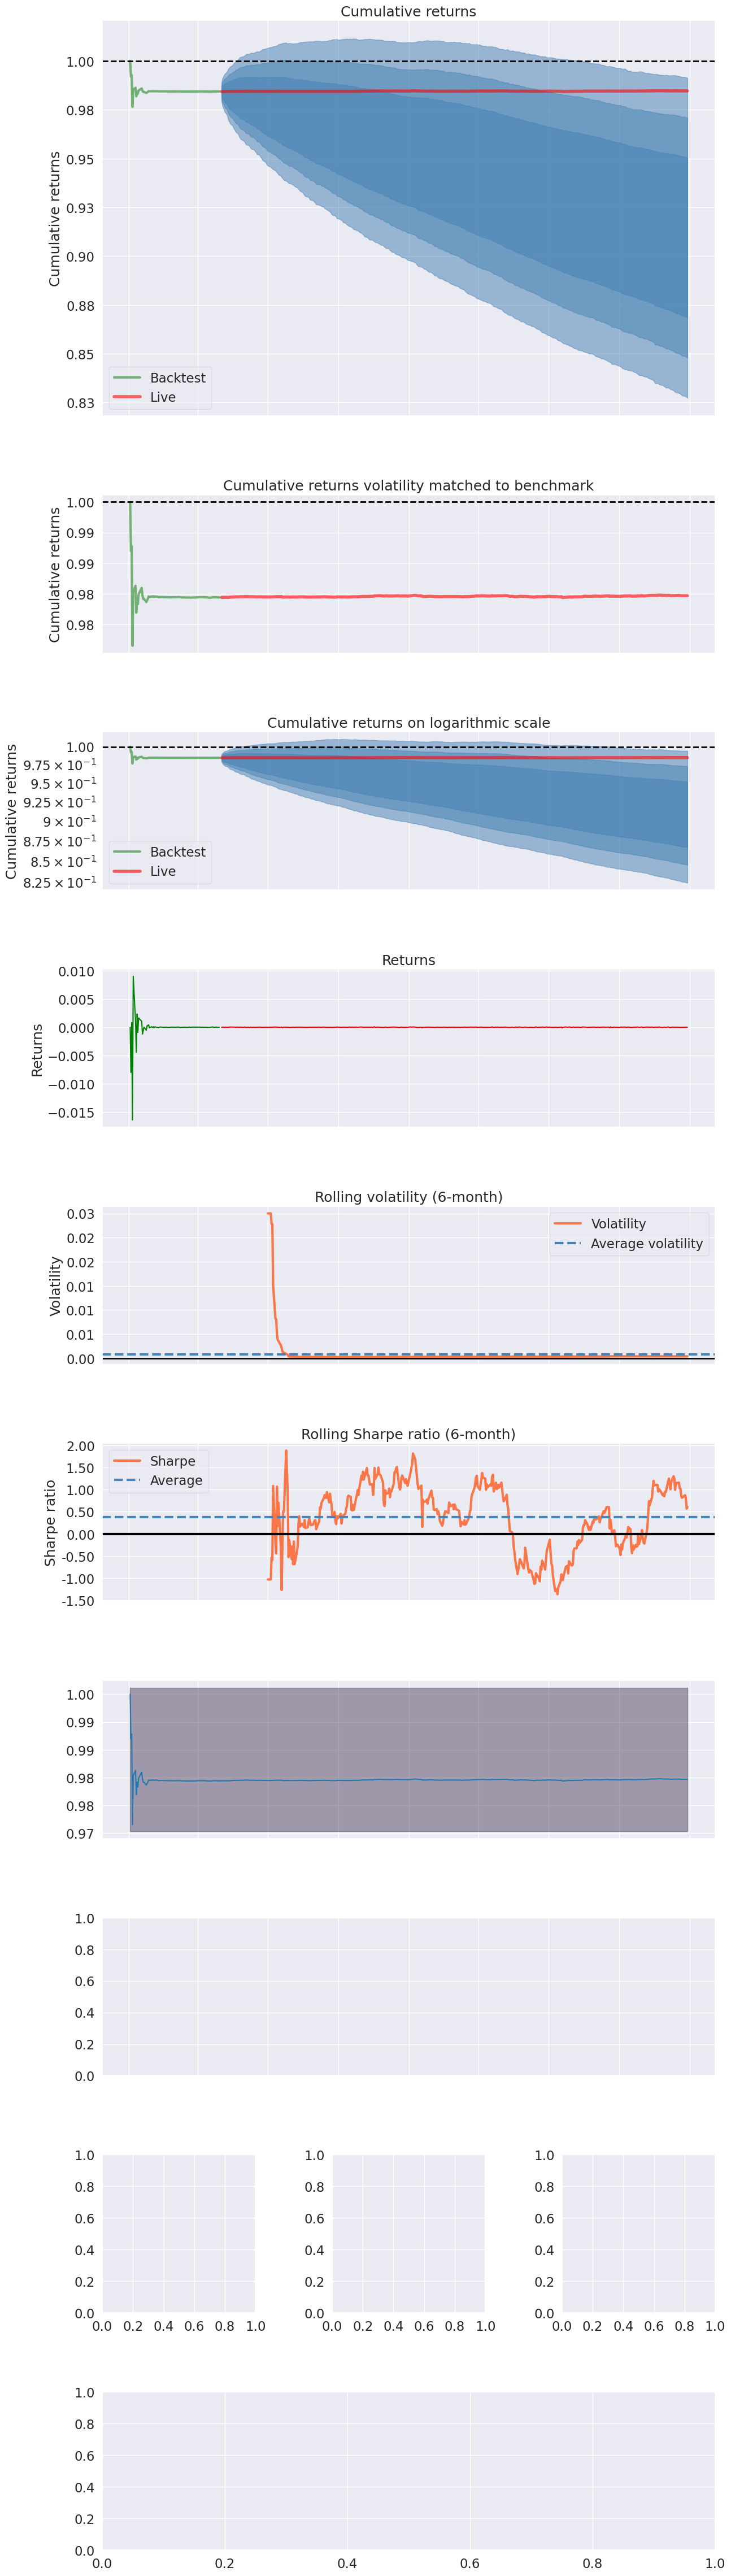

In [5]:
runstrat([])